## Problem Statement :

To predict the price range of mobile phones based on various mobile specifications like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc

#### Independent Variables :

1.battery_power:Total energy a battery can store in one time measured in mAh

2.blue:Has bluetooth or not
    
3.clock_speed:speed at which microprocessor executes instructions
    
4.dual_sim:Has dual sim support or not

5.fc:Front Camera mega pixels
    
6.four_g:Has 4G or not
    
7.int_memory:Internal Memory in Gigabytes
    
8.m_dep:Mobile Depth in cm
    
9.mobile_wt:Weight of mobile phone
    
10.n_cores:Number of cores of processor
    
11.pc:Primary Camera mega pixels
    
12.px_height:Pixel Resolution Height
    
13.px_width:Pixel Resolution Width
    
14.ram:Random Access Memory in Megabytes
    
15.sc_h:Screen Height of mobile in cm

16.sc_w:Screen Width of mobile in cm
    
17.talk_time:longest time that a single battery charge will last when you are talking
    
18.three_g:Has 3G or not
    
19.touch_screen:Has touch screen or not
    
20.wifi:Has wifi or not

#### Depenedent Variable :

21.price_range:This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## Importing Required Libraries :

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,f1_score,make_scorer,SCORERS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
plt.style.use('seaborn-whitegrid')

## Reading CSV file :

In [2]:
df_mobile=pd.read_csv("ML 2.csv")
# First 5 observations
df_mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df_mobile.shape

(2000, 21)

###### Inference : Dataset contains 2000 rows and 21 columns .

## Null Value Treatment :

In [4]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

###### Inference : The dataset consists of coninuous variables and discrete variables and encoded categorical variables.

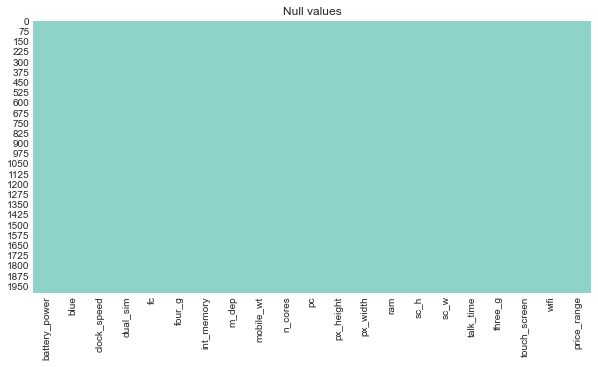

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df_mobile.isnull(),cbar=False,cmap='Set3')
plt.title("Null values")
plt.show()

###### Inference : No null values present in the dataset and thus no requirement of null value treatment .

## Exploratory Data Analysis :

In [6]:
# Categorical variables
df_cat=df_mobile.loc[:,['blue','dual_sim','four_g','three_g','touch_screen','wifi']]
df_cat.head(2)

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0


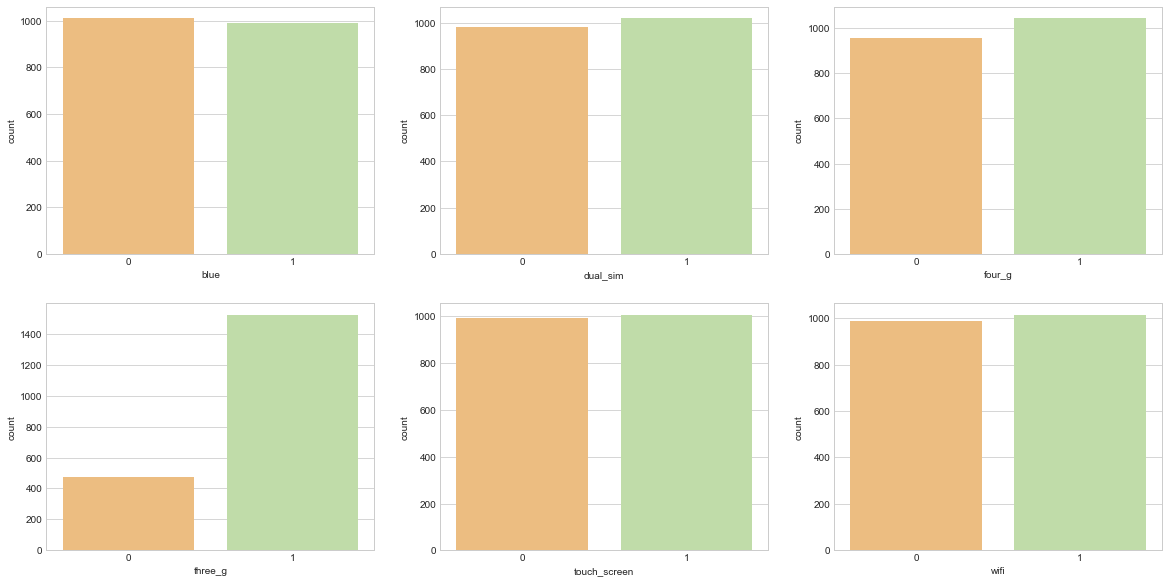

In [7]:
fig,ax=plt.subplots(2,3,figsize=(20,10))
for col,ax in zip(df_cat.columns,ax.flatten()):
    
    sns.countplot(df_cat[col],ax=ax,palette='Spectral')

plt.show()

###### Inference : 
###### 1.Mobile phones with and without bluetooth,dual sim, 4G, touch screen ,wifi are of the same count.
###### 2. Mobile phones count with 3G is much higher than without 3G.

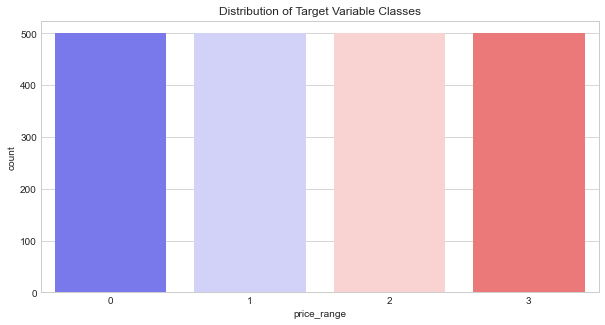

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(df_mobile['price_range'],palette='bwr')
plt.title("Distribution of Target Variable Classes")
plt.show()

###### Inference : The distribution of the target value is equal where the count of each class within the target variable is equal. Hence the classification models that will be built will not be biased to a particular class.

In [9]:
# Numerical variables
df_num=df_mobile.iloc[:,[0,2,4,6,7,8,9,10,11,12,13,14,15,16]]
df_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


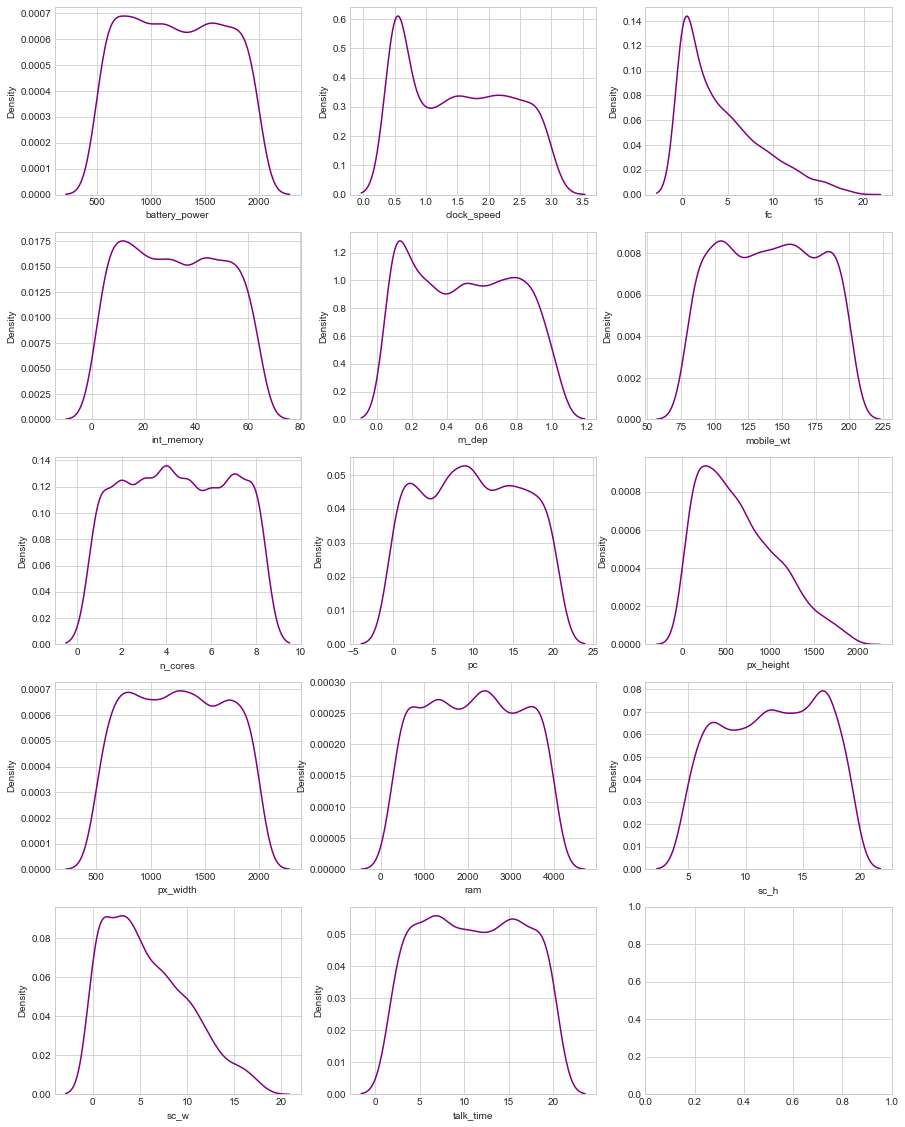

In [78]:
fig,ax=plt.subplots(5,3,figsize=(15,20))
for col,ax in zip(df_num.columns,ax.flatten()):
    sns.kdeplot(df_num[col],ax=ax,color='purple')
plt.show()

###### Inference : 
###### 1.As per skewness most of the variables have a positive skewness which means they have outliers towards the positive side.
###### 2. As per kurtosis, most of the variables are platykurtic which means the tails of the distribution plots are much thinner than that of a normal distribution.

## Outlier Treatment :

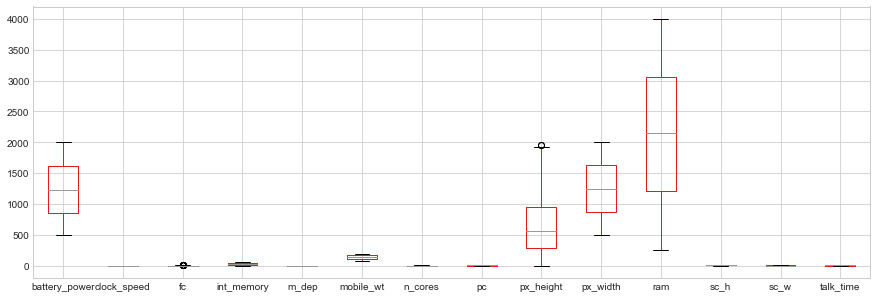

In [11]:
df_num.plot(kind='box',figsize=(15,5),cmap='Set1')
plt.show()

###### Inference : According to the boxplots there seems to be some outliers. But removing outliers may affect the target variables so we don't remove the outliers . Also there seems to be a difference in the scale of the variables and so there is a need to transform the data to a common scale.

## Association of variables :

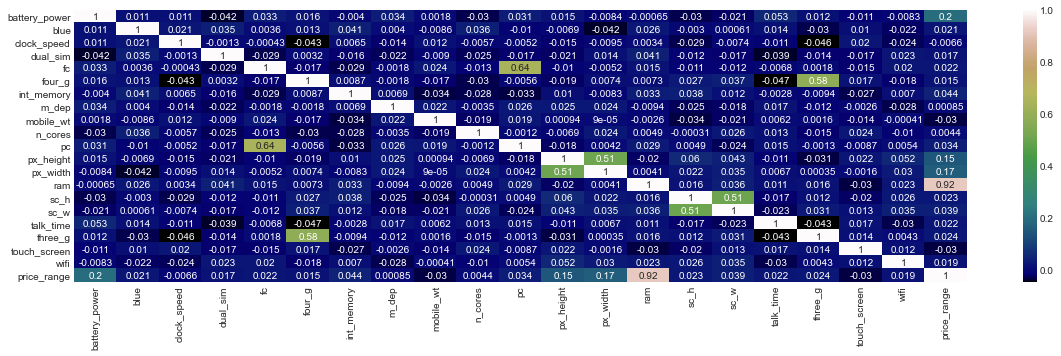

In [12]:
plt.figure(figsize=(20,5))
sns.heatmap(df_mobile.corr(),annot=True,cmap='gist_earth')
plt.show()

###### Inference: As per the heatmap above 'RAM' variable is highly correlated with the target variable with a correlation of 0.92.

## Data Preprocessing :

## Encoding:

###### Inference : Since the categorical variables are already encoded ,there is no need for further encoding .

## Scaling :

In [13]:
min_max=MinMaxScaler()
df_scaled=pd.DataFrame(min_max.fit_transform(df_mobile.iloc[:,:-1]),columns=df_mobile.columns[:-1])
df_scaled.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.1,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.3,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0


###### Inference : The dataset was scaled using Min-Max Scaler so as to obtain the values of the variables between the range 0 to 1 which gives us a normal distribution of variables.

## Splitting Data for Train & Test :

In [14]:
X=df_scaled
y=df_mobile['price_range']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)
print("Y train shape :",y_train.shape)
print("y test shape :",y_test.shape)

X train shape : (1400, 20)
X test shape : (600, 20)
Y train shape : (1400,)
y test shape : (600,)


## Defining Functions to Obtain Scores :
The mtrics used for evaluation of a model is F1 score so as to evaluate the performance of each class of the target variable.

In [15]:
#Classification Report
def train_Report(model):
    y_pred=model.predict(X_train)
    print("Train Data Classification report:\n",classification_report(y_train,y_pred))

def test_Report(model):
    y_pred=model.predict(X_test)
    print("Test Data Classification report:\n",classification_report(y_test,y_pred))

In [16]:
# F1 score  
score_card=pd.DataFrame(columns=['Model name','Train F1-Score','Test F1-Score'])
def update_score_card(algo,model):
    global score_card
    
    def train_f1(model):
        y_pred=model.predict(X_train)
        train_f1=f1_score(y_train,y_pred,average='weighted')
        return train_f1
    
    def test_f1(model):
        y_pred=model.predict(X_test)
        test_f1=f1_score(y_test,y_pred,average='weighted')
        return test_f1
    
    score_card=score_card.append({'Model name':algo,'Train F1-Score':train_f1(model),'Test F1-Score':test_f1(model)},ignore_index=True)
    return score_card

## Model Building :

In [17]:
f1=make_scorer(f1_score)

### 1. Logistic Regression (Base Model) :

In [18]:
log_reg1=LogisticRegression()
log_reg1.fit(X_train,y_train)

LogisticRegression()

In [19]:
train_Report(log_reg1)
test_Report(log_reg1)

Train Data Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       360
           1       0.89      0.88      0.89       343
           2       0.92      0.84      0.88       343
           3       0.93      0.99      0.96       354

    accuracy                           0.92      1400
   macro avg       0.92      0.92      0.92      1400
weighted avg       0.92      0.92      0.92      1400

Test Data Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       140
           1       0.89      0.84      0.86       157
           2       0.90      0.85      0.88       157
           3       0.95      0.97      0.96       146

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



###### Inference : in comparison with the f1 score of each classes in the train data we get almost similar results for the test data as well .

In [20]:
update_score_card("Logistic Regression (Base Model)",log_reg1)

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572


###### Inference : The average f1 score of each of the classes can be seen where the train data f1 score is 92% and test data f1 score is 91 %.

### 2 . K-Nearest Neighbors (Base Model) :

In [21]:
knn1=KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
train_Report(knn1)
test_Report(knn1)

Train Data Classification report:
               precision    recall  f1-score   support

           0       0.65      0.82      0.73       360
           1       0.54      0.55      0.54       343
           2       0.55      0.55      0.55       343
           3       0.80      0.58      0.67       354

    accuracy                           0.63      1400
   macro avg       0.64      0.63      0.62      1400
weighted avg       0.64      0.63      0.63      1400

Test Data Classification report:
               precision    recall  f1-score   support

           0       0.48      0.61      0.53       140
           1       0.28      0.28      0.28       157
           2       0.32      0.34      0.33       157
           3       0.56      0.36      0.44       146

    accuracy                           0.39       600
   macro avg       0.41      0.40      0.39       600
weighted avg       0.40      0.39      0.39       600



###### Inference : The f1 scores of the individual classes of the test data are much lower as compared to that of the train data ,suggesting overfitting.

In [23]:
update_score_card("KNN (Base Model)",knn1)

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572
1,KNN (Base Model),0.625432,0.389915


###### Inference : The average F1 scores obtained are much lower than the previous model .

### KNN (hyper-parameter tuning):

In [24]:
f1=make_scorer(f1_score)

tuned_param=[{"n_neighbors":[4,5,6,7,8,9,10,11,12,13,14,15],"metric":["euclidean","hamming","minkowski"]}]

knn2=KNeighborsClassifier()

rsearch=RandomizedSearchCV(estimator=knn2,param_distributions=tuned_param,cv=3,scoring='f1')

rsearch.fit(X_train,y_train)

rsearch.best_params_

In [25]:
best_param={'n_neighbors': 12, 'metric': 'hamming'}
knn2=KNeighborsClassifier(**best_param)
knn2.fit(X_train,y_train)

KNeighborsClassifier(metric='hamming', n_neighbors=12)

In [26]:
train_Report(knn2)
test_Report(knn2)

Train Data Classification report:
               precision    recall  f1-score   support

           0       0.38      0.53      0.44       360
           1       0.37      0.36      0.37       343
           2       0.44      0.37      0.40       343
           3       0.45      0.34      0.39       354

    accuracy                           0.40      1400
   macro avg       0.41      0.40      0.40      1400
weighted avg       0.41      0.40      0.40      1400

Test Data Classification report:
               precision    recall  f1-score   support

           0       0.20      0.32      0.24       140
           1       0.22      0.20      0.21       157
           2       0.26      0.20      0.22       157
           3       0.25      0.17      0.20       146

    accuracy                           0.22       600
   macro avg       0.23      0.22      0.22       600
weighted avg       0.23      0.22      0.22       600



###### Inference : After hyperparameter tuning the individual f1 score of classes have reduced even more.

In [27]:
update_score_card("KNN (Randomised Search)",knn2)

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572
1,KNN (Base Model),0.625432,0.389915
2,KNN (Randomised Search),0.400511,0.219234


###### Inference : As per the score card above we can see the reduction in the average F1 scores of train and test data.

### Ensemble Learning :

### 3. Random Forest (Base Model) :

In [28]:
rf1=RandomForestClassifier(random_state=10)
rf1.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [29]:
train_Report(rf1)
test_Report(rf1)

Train Data Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       343
           2       1.00      1.00      1.00       343
           3       1.00      1.00      1.00       354

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

Test Data Classification report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       140
           1       0.81      0.81      0.81       157
           2       0.81      0.76      0.79       157
           3       0.90      0.90      0.90       146

    accuracy                           0.85       600
   macro avg       0.85      0.86      0.86       600
weighted avg       0.85      0.85      0.85       600



###### Inference : The F1 scores of the train data is 1 suggesting the model is highly over-fitted.

In [30]:
update_score_card("Random Forest (Base Model)",rf1)

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572
1,KNN (Base Model),0.625432,0.389915
2,KNN (Randomised Search),0.400511,0.219234
3,Random Forest (Base Model),1.000000,0.852332


###### Inference : The  average F1 score of test data is much lower than that of the train data which clearly proves over-fitting.

###  Random Forest (hyper-parameter tuning):

tuned_param=[{"n_estimators":range(100,150),"criterion":['gini','entropy'],
    "max_depth":range(5,15),"max_features":range(5,20)}]

rf2=RandomForestClassifier(random_state=10)

rsearch=RandomizedSearchCV(estimator=rf2,param_distributions=tuned_param,cv=3,scoring=f1)
rsearch.fit(X_train,y_train)


rsearch.best_params_

In [31]:
best_param={'n_estimators': 122, 'max_features': 13, 'max_depth': 6, 'criterion': 'gini'}
rf2=RandomForestClassifier(random_state=10,**best_param)
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=13, n_estimators=122,
                       random_state=10)

In [32]:
train_Report(rf2)
test_Report(rf2)

Train Data Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       360
           1       0.93      0.94      0.94       343
           2       0.94      0.96      0.95       343
           3       1.00      0.98      0.99       354

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400

Test Data Classification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       140
           1       0.82      0.85      0.83       157
           2       0.85      0.78      0.82       157
           3       0.90      0.95      0.92       146

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



###### Inference : After tuning hyper-parameters we get a reduction in over-fitting .

In [33]:
update_score_card("Random Forest (Randomised Search)",rf2)

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572
1,KNN (Base Model),0.625432,0.389915
2,KNN (Randomised Search),0.400511,0.219234
3,Random Forest (Base Model),1.000000,0.852332
4,Random Forest (Randomised Search),0.963033,0.870980


###### Inference : The average F1 score of the train data has decreased and F1 score of the test data has increased.

### XGBoost (Base Model) :

In [34]:
xgb1=XGBClassifier(random_state=10)
xgb1.fit(X_train,y_train)

[18:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
train_Report(xgb1)
test_Report(xgb1)

Train Data Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       343
           2       1.00      1.00      1.00       343
           3       1.00      1.00      1.00       354

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

Test Data Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       140
           1       0.88      0.92      0.90       157
           2       0.91      0.84      0.87       157
           3       0.91      0.93      0.92       146

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



###### Inference : The model is over-fitting on the train data.

In [36]:
update_score_card("XGB (Base Model)",xgb1)

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572
1,KNN (Base Model),0.625432,0.389915
2,KNN (Randomised Search),0.400511,0.219234
3,Random Forest (Base Model),1.000000,0.852332
4,Random Forest (Randomised Search),0.963033,0.870980
5,XGB (Base Model),1.000000,0.907983


###### Inference : An over-fitting model is obtained and requires tuning the hyper-parameters.

### XGBoost (hyper-parameter tuning) :

tuned_param=[{"n_estimators":range(100,150),"learning_rate":[0.001,0.002,0.004,0.006,0.008,0.01,0.02,0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.8,1], "max_depth":range(5,15)}]

xgb2=XGBClassifier(random_state=10)

rsearch=RandomizedSearchCV(estimator=xgb2,param_distributions=tuned_param,cv=3,scoring=f1)

rsearch.fit(X_train,y_train)

rsearch.best_params_

In [37]:
best_param={'n_estimators': 125, 'max_depth': 9, 'learning_rate': 0.006}
xgb2=XGBClassifier(random_state=10,**best_param)
xgb2.fit(X_train,y_train)

[18:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.006, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=125, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
train_Report(xgb2)
test_Report(xgb2)

Train Data Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       360
           1       0.98      0.99      0.98       343
           2       0.98      0.99      0.99       343
           3       1.00      0.98      0.99       354

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400

Test Data Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       140
           1       0.85      0.89      0.87       157
           2       0.88      0.76      0.82       157
           3       0.85      0.92      0.89       146

    accuracy                           0.87       600
   macro avg       0.87      0.88      0.87       600
weighted avg       0.87      0.87      0.87       600



###### Inference : The model seems to over-fit on the train data.

In [39]:
update_score_card("XGB (Randomised Search)",xgb2)

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572
1,KNN (Base Model),0.625432,0.389915
2,KNN (Randomised Search),0.400511,0.219234
3,Random Forest (Base Model),1.000000,0.852332
4,Random Forest (Randomised Search),0.963033,0.870980
5,XGB (Base Model),1.000000,0.907983
6,XGB (Randomised Search),0.987868,0.872061


###### Inference : We get an average F1 score of 98% on train data and 87% on test data . Thus proving to be an over-fitting model.

In [40]:
score_card.style.highlight_max(['Test F1-Score'],color='pink')

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572
1,KNN (Base Model),0.625432,0.389915
2,KNN (Randomised Search),0.400511,0.219234
3,Random Forest (Base Model),1.000000,0.852332
4,Random Forest (Randomised Search),0.963033,0.870980
5,XGB (Base Model),1.000000,0.907983
6,XGB (Randomised Search),0.987868,0.872061


###### Inference : Since we get the highest Test F1-Score using  Logistic Regression (Base Model) .The model is further tried to imporve upon by applying Dimensionality Reduction.

## Dimensionality Reduction using Principal Component Analysis (PCA):

 Since there is multi-collinearity present in the dataset , it gives rise to redundancy in the data and so there is a need for dimensionality reduction.

In [41]:
pca=PCA()
pca.fit(X_train,y_train)

PCA()

In [42]:
# Eigen value
eig_val=pca.explained_variance_
eig_val

array([0.34715747, 0.26503236, 0.25642382, 0.25196813, 0.2324126 ,
       0.12643172, 0.12422923, 0.10668102, 0.10550353, 0.10411878,
       0.09870145, 0.09225236, 0.08623989, 0.08506322, 0.0834866 ,
       0.08172654, 0.07794573, 0.03392863, 0.02942708, 0.02275591])

In [43]:
# Calculating variance explained by individual components
tot=sum(eig_val)
var_exp=[(i/tot)*100 for i in sorted(eig_val,reverse=True)]

# Cummulative variance 
cum_var_exp=np.cumsum(var_exp)

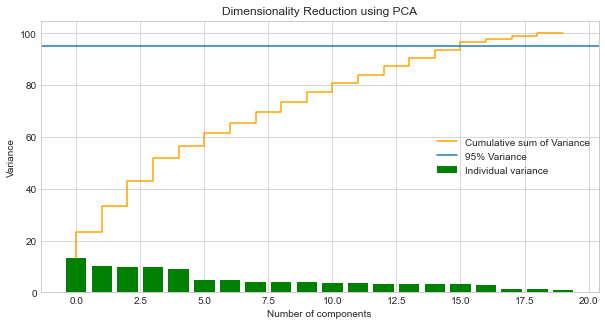

In [44]:
plt.figure(figsize=(10,5))
plt.bar(range(0,20),var_exp,color='green',label='Individual variance',align='center')
plt.step(range(0,20),cum_var_exp,color='orange',label='Cumulative sum of Variance')
plt.axhline(y=95,label='95% Variance')
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.title('Dimensionality Reduction using PCA')
plt.legend()
plt.show()

###### Inference : As per the plot above about 15 components out of 20 should give 95% variance .

In [45]:
X=df_scaled
y=df_mobile['price_range']

In [46]:
pca_95=PCA(0.95,random_state=10)
df_pca=pd.DataFrame(pca_95.fit_transform(X))

In [47]:
df_pca.shape

(2000, 17)

###### Inference :  After PCA we get a data with 17 columns.

### Using the new data to build a logistic regression model :

In [48]:
X=df_pca
y=df_mobile['price_range']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)
print("Y train shape :",y_train.shape)
print("y test shape :",y_test.shape)

X train shape : (1400, 17)
X test shape : (600, 17)
Y train shape : (1400,)
y test shape : (600,)


In [49]:
log_reg2=LogisticRegression()
log_reg2.fit(X_train,y_train)

LogisticRegression()

In [50]:
train_Report(log_reg2)
test_Report(log_reg2)

Train Data Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       360
           1       0.88      0.87      0.88       343
           2       0.90      0.83      0.86       343
           3       0.93      0.97      0.95       354

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400

Test Data Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       140
           1       0.88      0.83      0.85       157
           2       0.87      0.83      0.85       157
           3       0.92      0.95      0.94       146

    accuracy                           0.89       600
   macro avg       0.89      0.90      0.89       600
weighted avg       0.89      0.89      0.89       600



###### Inference : After PCA , the classification model model gives almost similar  F1 scores on each of the classes with respect to train & test data.

In [51]:
update_score_card("Logistic Regression (PCA)",log_reg2)

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572
1,KNN (Base Model),0.625432,0.389915
2,KNN (Randomised Search),0.400511,0.219234
3,Random Forest (Base Model),1.000000,0.852332
4,Random Forest (Randomised Search),0.963033,0.870980
5,XGB (Base Model),1.000000,0.907983
6,XGB (Randomised Search),0.987868,0.872061
7,Logistic Regression (PCA),0.913375,0.892136


###### Inference : Logistic Regression (PCA) model gives a good score with average F1 score as 91% on train data and 89% on test data. However the Logistic Regression (Base Model)	remains the best fitted model.

## Evaluating the results by cross validation :

In [52]:
f1=make_scorer(f1_score)

In [53]:
X=df_scaled
y=df_mobile['price_range']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [75]:
scores=cross_val_score(estimator=log_reg2,X=X_train,y=y_train,cv=10,scoring='f1_weighted')
print("Max F1-score:",scores.max())
print("Min F1-score:",scores.min())
print("Mean F1-score:",scores.mean())

Max F1-score: 0.956778540101947
Min F1-score: 0.8454458502024291
Mean F1-score: 0.8989623434832141


###### Inference : After cross-validation we get an average F1 score score of 89% . Considering  the score after cross-validation the Logistic Regression after PCA gives the appropriate result.

In [76]:
score_card

,Model name,Train F1-Score,Test F1-Score
0,Logistic Regression (Base Model),0.923357,0.910572
1,KNN (Base Model),0.625432,0.389915
2,KNN (Randomised Search),0.400511,0.219234
3,Random Forest (Base Model),1.000000,0.852332
4,Random Forest (Randomised Search),0.963033,0.870980
5,XGB (Base Model),1.000000,0.907983
6,XGB (Randomised Search),0.987868,0.872061
7,Logistic Regression (PCA),0.913375,0.892136


#### Conclusion  :
- The Logistic Regression model after Dimensionality Reduction using PCA gives a Train F1-Score of 91% and Test F1-Score of 89%.
- The model is considered to be the best fit model as proved by cross-validation.
- The F1 scores are quite high indicating low bias and the difference between Train F1-Score and Test F1-Score are quite low suggesting low variance .
- Therefore Logistic Regression (PCA) would be best suited for predicting the range of mobile price.